In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [4]:
os.chdir("E:/[DesireCourse.Net] Udemy - Complete Tensorflow 2 and Keras Deep Learning Bootcamp/1. Course Overview, Installs, and Setup/2.1 FINAL_TF2_FILES.zip/TF_2_Notebooks_and_Data/DATA")

In [5]:
df = pd.read_csv("cancer_classification.csv")

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


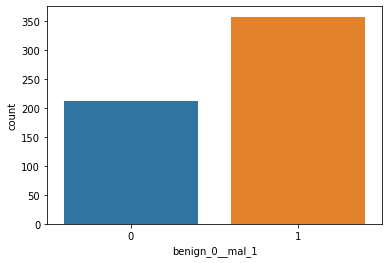

In [9]:
sns.countplot(x = "benign_0__mal_1",data=df)

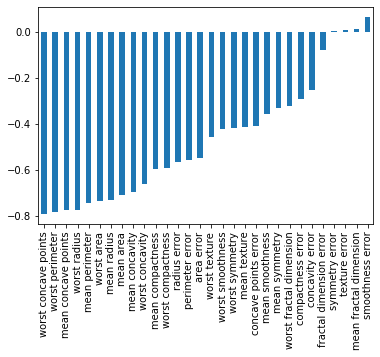

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind="bar")

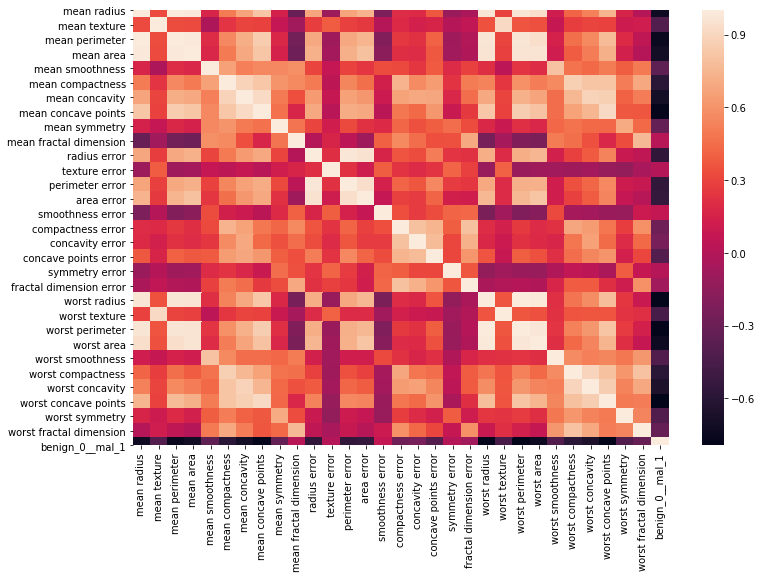

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [26]:
X = df.drop("benign_0__mal_1",axis=1).values
y = df["benign_0__mal_1"].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
X_train.shape

(426, 30)

In [34]:
model = Sequential()

model.add(Dense(30,activation="relu"))

model.add(Dense(15,activation="relu"))

## Binary classification

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6617 - val_loss: 0.6409
Epoch 2/600
426/426 [==============================] - 0s 197us/sample - loss: 0.6196 - val_loss: 0.6013
Epoch 3/600
426/426 [==============================] - 0s 139us/sample - loss: 0.5774 - val_loss: 0.5555
Epoch 4/600
426/426 [==============================] - 0s 148us/sample - loss: 0.5232 - val_loss: 0.4956
Epoch 5/600
426/426 [==============================] - 0s 138us/sample - loss: 0.4645 - val_loss: 0.4359
Epoch 6/600
426/426 [==============================] - 0s 145us/sample - loss: 0.4092 - val_loss: 0.3842
Epoch 7/600
426/426 [==============================] - 0s 186us/sample - loss: 0.3611 - val_loss: 0.3352
Epoch 8/600
426/426 [==============================] - 0s 176us/sample - loss: 0.3209 - val_loss: 0.2964
Epoch 9/600
426/426 [==============================] - 0s 165us/sample - loss: 0.2860 - val_loss: 0.2663
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0574 - val_loss: 0.1229
Epoch 79/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0531 - val_loss: 0.1171
Epoch 80/600
426/426 [==============================] - 0s 387us/sample - loss: 0.0554 - val_loss: 0.1223
Epoch 81/600
426/426 [==============================] - 0s 263us/sample - loss: 0.0654 - val_loss: 0.1127
Epoch 82/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0552 - val_loss: 0.1278
Epoch 83/600
426/426 [==============================] - 0s 209us/sample - loss: 0.0531 - val_loss: 0.1226
Epoch 84/600
426/426 [==============================] - 0s 255us/sample - loss: 0.0550 - val_loss: 0.1154
Epoch 85/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0577 - val_loss: 0.1319
Epoch 86/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0603 - val_loss: 0.1125
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0465 - val_loss: 0.1460
Epoch 156/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0463 - val_loss: 0.1537
Epoch 157/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0450 - val_loss: 0.1507
Epoch 158/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0456 - val_loss: 0.1561
Epoch 159/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0482 - val_loss: 0.1424
Epoch 160/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0468 - val_loss: 0.1477
Epoch 161/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0460 - val_loss: 0.1509
Epoch 162/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0471 - val_loss: 0.1527
Epoch 163/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0452 - val_loss: 0.1491
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 155us/sample - loss: 0.0409 - val_loss: 0.1653
Epoch 232/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0426 - val_loss: 0.1745
Epoch 233/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0422 - val_loss: 0.1634
Epoch 234/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0407 - val_loss: 0.1654
Epoch 235/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0452 - val_loss: 0.1943
Epoch 236/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0464 - val_loss: 0.1521
Epoch 237/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0414 - val_loss: 0.1847
Epoch 238/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0402 - val_loss: 0.1718
Epoch 239/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0411 - val_loss: 0.1565
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 152us/sample - loss: 0.0370 - val_loss: 0.1817
Epoch 308/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0390 - val_loss: 0.1991
Epoch 309/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0389 - val_loss: 0.1770
Epoch 310/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0394 - val_loss: 0.1908
Epoch 311/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0371 - val_loss: 0.1886
Epoch 312/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0366 - val_loss: 0.1780
Epoch 313/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0381 - val_loss: 0.1922
Epoch 314/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0378 - val_loss: 0.1779
Epoch 315/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0368 - val_loss: 0.1832
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 145us/sample - loss: 0.0336 - val_loss: 0.1960
Epoch 384/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0344 - val_loss: 0.1864
Epoch 385/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0336 - val_loss: 0.1974
Epoch 386/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0386 - val_loss: 0.2290
Epoch 387/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0374 - val_loss: 0.1671
Epoch 388/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0378 - val_loss: 0.2018
Epoch 389/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0336 - val_loss: 0.2128
Epoch 390/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0415 - val_loss: 0.1785
Epoch 391/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0350 - val_loss: 0.2093
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 150us/sample - loss: 0.0324 - val_loss: 0.2058
Epoch 460/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0305 - val_loss: 0.2304
Epoch 461/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0314 - val_loss: 0.2056
Epoch 462/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0313 - val_loss: 0.1985
Epoch 463/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0323 - val_loss: 0.2043
Epoch 464/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0392 - val_loss: 0.1972
Epoch 465/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0312 - val_loss: 0.1887
Epoch 466/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0323 - val_loss: 0.2159
Epoch 467/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0314 - val_loss: 0.2182
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 181us/sample - loss: 0.0307 - val_loss: 0.1992
Epoch 536/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0320 - val_loss: 0.3217
Epoch 537/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0413 - val_loss: 0.1750
Epoch 538/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0547 - val_loss: 0.2576
Epoch 539/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0320 - val_loss: 0.2159
Epoch 540/600
426/426 [==============================] - 0s 192us/sample - loss: 0.0300 - val_loss: 0.2359
Epoch 541/600
426/426 [==============================] - 0s 265us/sample - loss: 0.0280 - val_loss: 0.1978
Epoch 542/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0323 - val_loss: 0.2242
Epoch 543/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0456 - val_loss: 0.2237
Epoch 544/600
426/426 [============================

In [36]:
losses = pd.DataFrame(model.history.history)

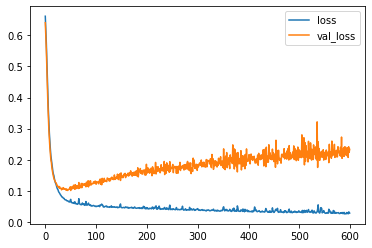

In [37]:
losses.plot()

In [40]:
model = Sequential()

model.add(Dense(30,activation="relu"))

model.add(Dense(15,activation="relu"))

## Binary classification

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [43]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6784 - val_loss: 0.6428
Epoch 2/600
426/426 [==============================] - 0s 160us/sample - loss: 0.6248 - val_loss: 0.5887
Epoch 3/600
426/426 [==============================] - 0s 155us/sample - loss: 0.5683 - val_loss: 0.5353
Epoch 4/600
426/426 [==============================] - 0s 141us/sample - loss: 0.5126 - val_loss: 0.4793
Epoch 5/600
426/426 [==============================] - 0s 145us/sample - loss: 0.4565 - val_loss: 0.4237
Epoch 6/600
426/426 [==============================] - 0s 154us/sample - loss: 0.4045 - val_loss: 0.3722
Epoch 7/600
426/426 [==============================] - 0s 150us/sample - loss: 0.3604 - val_loss: 0.3306
Epoch 8/600
426/426 [==============================] - 0s 152us/sample - loss: 0.3243 - val_loss: 0.2956
Epoch 9/600
426/426 [==============================] - 0s 155us/sample - loss: 0.2933 - val_loss: 0.2668
Epoch 10/60

In [44]:
model_loss = pd.DataFrame(model.history.history)

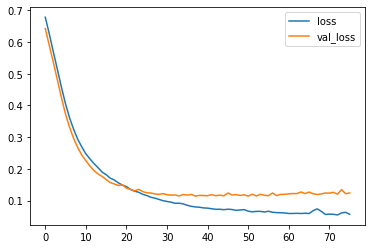

In [45]:
model_loss.plot()

In [47]:
from tensorflow.keras.layers import Dropout

In [48]:
model = Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(15,activation="relu"))
model.add(Dropout(rate=0.5))

## Binary classification

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [49]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6729 - val_loss: 0.6365
Epoch 2/600
426/426 [==============================] - 0s 162us/sample - loss: 0.6384 - val_loss: 0.6123
Epoch 3/600
426/426 [==============================] - 0s 162us/sample - loss: 0.6258 - val_loss: 0.5876
Epoch 4/600
426/426 [==============================] - 0s 151us/sample - loss: 0.6063 - val_loss: 0.5619
Epoch 5/600
426/426 [==============================] - 0s 196us/sample - loss: 0.5708 - val_loss: 0.5277
Epoch 6/600
426/426 [==============================] - 0s 182us/sample - loss: 0.5553 - val_loss: 0.4947
Epoch 7/600
426/426 [==============================] - 0s 147us/sample - loss: 0.5370 - val_loss: 0.4656
Epoch 8/600
426/426 [==============================] - 0s 148us/sample - loss: 0.5012 - val_loss: 0.4369
Epoch 9/600
426/426 [==============================] - 0s 154us/sample - loss: 0.5007 - val_loss: 0.4094
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 185us/sample - loss: 0.1116 - val_loss: 0.0923
Epoch 79/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0990 - val_loss: 0.0904
Epoch 80/600
426/426 [==============================] - 0s 152us/sample - loss: 0.1123 - val_loss: 0.1040
Epoch 81/600
426/426 [==============================] - 0s 153us/sample - loss: 0.1276 - val_loss: 0.0925
Epoch 82/600
426/426 [==============================] - 0s 155us/sample - loss: 0.1039 - val_loss: 0.0887
Epoch 83/600
426/426 [==============================] - 0s 162us/sample - loss: 0.1181 - val_loss: 0.0952
Epoch 84/600
426/426 [==============================] - 0s 159us/sample - loss: 0.1080 - val_loss: 0.0864
Epoch 85/600
426/426 [==============================] - 0s 149us/sample - loss: 0.1166 - val_loss: 0.0920
Epoch 86/600
426/426 [==============================] - 0s 168us/sample - loss: 0.1015 - val_loss: 0.0891
Epoch 87/600
426/426 [========================

In [50]:
model_loss = pd.DataFrame(model.history.history)

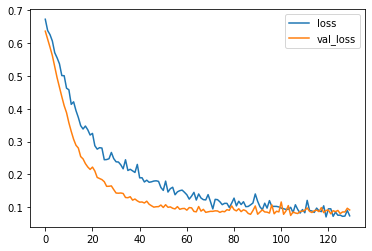

In [51]:
model_loss.plot()

In [53]:
predictions = model.predict_classes(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.98      0.97      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [56]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 3 85]]
